In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\training.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection\Filtered_Featuress.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Video ID,Video Title,Channel,Published Date,Views,Likes,Comments,Subscribers,...,Category_Cluster_x,Year,Month,Day,DayOfWeek,DayName,Views_per_Sub,Engagement,Like_per_Sub,Comment_per_Sub
0,0,0,26,4388,2187,0.988754,34727,686,16,4190000,...,2,2025,10,20,0,0.166667,0.008288,0.020214,0.000164,0.000004
1,1,1,1447,2374,4507,0.898341,45151,1514,21,188000,...,2,2025,10,16,3,0.666667,0.240164,0.033996,0.008053,0.000112
2,2,2,3989,2973,4820,0.910707,353713,6485,127,37300,...,2,2025,10,17,4,0.000000,9.482668,0.018693,0.173856,0.003405
3,3,3,7437,7301,3101,0.944730,2171652,78431,183,43800,...,1,2025,10,18,5,0.333333,49.579964,0.036200,1.790621,0.004178
4,4,4,2123,7961,1298,0.892396,246429,9321,949,2490000,...,0,2025,10,16,3,0.666667,0.098967,0.041675,0.003743,0.000381


# SKEWNESNI ANIQLASH 

In [3]:
# faqat raqamli ustunlar uchun
skewness = df.select_dtypes(include=['number']).skew()

# Natijani ko‘rish
print("📊 Skewness (egiklik) qiymatlari:\n")
print(skewness)


📊 Skewness (egiklik) qiymatlari:

Unnamed: 0.1           0.000000
Unnamed: 0             0.000000
Video ID               0.000000
Video Title            0.007234
Channel                0.004222
Published Date        -2.672121
Views                  7.030806
Likes                  7.650718
Comments              58.905331
Subscribers           20.013056
Channel Views         25.510795
Country               -0.305575
Region                -0.081507
CategoryID            -0.833932
CategoryName          -0.020343
Cluster                5.532678
CategoryID_enc         0.007883
VideoCluster           0.183385
Channel_Cluster        4.320688
Video_Cluster          2.354969
Country_Cluster_x      0.164864
Category_Cluster_x     0.069867
Year                   0.000000
Month                 -6.920496
Day                   -0.805985
DayOfWeek             -0.362184
DayName                0.067161
Views_per_Sub         36.135964
Engagement             8.880799
Like_per_Sub          66.808133
Commen

In [4]:
import numpy as np
import pandas as pd

# Asl DataFrame ni nusxalab olamiz
df = df.copy()

# 1️⃣ Transformatsiyadan oldingi skewness
before_skew = df.select_dtypes(include=['number']).skew().reset_index()
before_skew.columns = ['Column', 'Before_Skew']

# 2️⃣ Positive va Negative skew ustunlar
positive_cols = [
    'Views', 'Likes', 'Comments', 'Subscribers', 'Channel Views',
    'Cluster', 'Channel_Cluster', 'Video_Cluster',
    'Views_per_Sub', 'Engagement', 'Like_per_Sub', 'Comment_per_Sub'
]

negative_cols = ['Published Date', 'CategoryID', 'Month']

# 3️⃣ Agar datetime bo‘lsa → raqamga o‘tkazamiz
if np.issubdtype(df['Published Date'].dtype, np.datetime64):
    df['Published Date'] = df['Published Date'].astype('int64') // 10**9

# 4️⃣ Positive skew ustunlarga log1p transformatsiya
for col in positive_cols:
    if col in df.columns:
        min_val = df[col].min()
        df[col] = np.log1p(df[col] - min_val + 1)

# 5️⃣ Negative skew ustunlarga kvadrat (yoki exp) transformatsiya
for col in negative_cols:
    if col in df.columns:
        min_val = df[col].min()
        df[col] = (df[col] - min_val + 1) ** 2

# 6️⃣ Transformatsiyadan keyingi skewness
after_skew = df.select_dtypes(include=['number']).skew().reset_index()
after_skew.columns = ['Column', 'After_Skew']

# 7️⃣ Taqqoslash jadvali
compare_skew = pd.merge(before_skew, after_skew, on='Column', how='outer')
compare_skew['Change'] = compare_skew['After_Skew'] - compare_skew['Before_Skew']
compare_skew = compare_skew.sort_values(by='Change')

# 8️⃣ Jadvalni chiqaramiz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("📊 Skewness Before vs After:\n")
print(compare_skew)


📊 Skewness Before vs After:

                Column  Before_Skew  After_Skew        Change
16        Like_per_Sub    66.808133    6.316931 -6.049120e+01
9             Comments    58.905331   -0.130725 -5.903606e+01
8      Comment_per_Sub    90.926647   44.831388 -4.609526e+01
29       Views_per_Sub    36.135964    1.417450 -3.471851e+01
5        Channel Views    25.510795   -0.162328 -2.567312e+01
21         Subscribers    20.013056   -0.141778 -2.015483e+01
17               Likes     7.650718   -1.386932 -9.037650e+00
28               Views     7.030806    0.048475 -6.982332e+00
15          Engagement     8.880799    6.130045 -2.750755e+00
6      Channel_Cluster     4.320688    4.197076 -1.236121e-01
27       Video_Cluster     2.354969    2.268441 -8.652860e-02
7              Cluster     5.532678    5.516215 -1.646348e-02
11   Country_Cluster_x     0.164864    0.164864  0.000000e+00
4              Channel     0.004222    0.004222  0.000000e+00
2         CategoryName    -0.020343   -0.

# Models Training Process 

# RandomForestClassifier TRAINING 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# X va y ajratamiz
X = df.drop('CategoryName', axis=1)
y = df['CategoryName']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# (0.25 * 0.8 = 0.2 => 60/20/20)

# Model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

# Validation natijalar
y_pred = rf.predict(X_val)

print("✅ Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


✅ Validation Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       107
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       175
           6       1.00      1.00      1.00       137
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00       189
           9       1.00      1.00      1.00       165
          10       1.00      1.00      1.00       108

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


🧩 Confusion Matrix:
 [[224   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   0]
 [  0   0 260   0

# Save RandomForestClassifier Model 

In [6]:
import joblib
joblib.dump(rf, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\RandomForestClassifier.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# 🧩 `class_weight='balanced'` — To‘liq Tushuntirish

## 📘 1. Nima uchun kerak?

`class_weight='balanced'` parametri **klassifikatsiya** (tasniflash) modellari uchun ishlatiladi.  
U **imbalanced dataset** (ya’ni sinflar soni teng bo‘lmagan) holatlarda juda foydali.

Masalan:  
Agar sizda quyidagicha ma’lumot bo‘lsa 👇  
| Sinf | Namuna soni |
|------|--------------|
| A | 9000 |
| B | 1000 |

Model odatda **A sinfga ko‘proq e’tibor beradi**, chunki u ko‘p uchraydi.  
Natijada **B sinf** yomon bashorat qilinadi.

`class_weight='balanced'` esa bu nomutanosiblikni **avtomatik tarzda tuzatadi** ✅

---

## ⚙️ 2. Texnik tushuntirish

Model har bir sinf uchun og‘irlik (weight) ni quyidagicha hisoblaydi:

\[
w_i = \frac{N}{K \times n_i}
\]

bu yerda:
- \( w_i \) — i-sinfning og‘irligi  
- \( N \) — umumiy namunalar soni  
- \( K \) — sinflar soni  
- \( n_i \) — i-sinfga tegishli namunalar soni  

👉 Natijada kam namunali sinf uchun og‘irlik **katta**, ko‘p namunali sinf uchun **kichik** bo‘ladi.

---

## 🎯 3. Qachon ishlatiladi?

| Holat | Parametr qiymati | Izoh |
|-------|------------------|------|
| Sinflar balansda | `None` | Barcha sinflarda namunalar soni teng |
| Sinflar imbalanced | `'balanced'` | Og‘irliklar avtomatik hisoblanadi |
| Maxsus og‘irlik berish kerak bo‘lsa | `{'A': 3, 'B': 1}` | “A” sinfni 3 baravar muhimroq deb belgilaydi |

---

## 🧠 4. Amaliy misol (Python)

## class_weight='balanced' — bu modelga “muvozanatsiz sinflar”ni hisobga ol degan buyruqdir.
## Shu orqali model kam uchraydigan sinflarni yaxshiroq aniqlaydi, F1 va Recall ko‘rsatkichlarini yaxshilaydi.

# DecisionTreeClassifier  TRAINING 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# X va y ajratamiz
X = df.drop('CategoryName', axis=1)
y = df['CategoryName']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train, y_train)

# Validation natijalar
y_pred = dt.predict(X_val)

print("🌳 Decision Tree Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


🌳 Decision Tree Validation Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       107
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       175
           6       1.00      1.00      1.00       137
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00       189
           9       1.00      1.00      1.00       165
          10       1.00      1.00      1.00       108

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


🧩 Confusion Matrix:
 [[224   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   0]
 [ 

# Save DecisionTreeClassifier Model 

In [8]:
import joblib
joblib.dump(dt, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\DecisionTreeClassifier.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# Logistic Regression  TRAINING 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# X va y
X = df.drop('CategoryName', axis=1)
y = df['CategoryName']

# Train / Validation / Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Model
lr = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    class_weight='balanced',
    solver='lbfgs',
    random_state=42
)
lr.fit(X_train, y_train)

# Validation
y_pred = lr.predict(X_val)

print("📈 Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📈 Logistic Regression Validation Accuracy: 0.9994114184814596

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       107
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       175
           6       1.00      1.00      1.00       137
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00       189
           9       1.00      0.99      1.00       165
          10       1.00      1.00      1.00       108

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


🧩 Confusion Matrix:
 [[224   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Save Logistic Regression Model 

In [13]:
import joblib
joblib.dump(lr, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\LogisticRegression.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# XGBoost Classifier TRAINING

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# X va y
X = df.drop('CategoryName', axis=1)
y = df['CategoryName']

# Train / Validation / Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42,
    eval_metric='mlogloss'
)
xgb.fit(X_train, y_train)

# Validation
y_pred = xgb.predict(X_val)

print("⚡ XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


⚡ XGBoost Validation Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       107
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       175
           6       1.00      1.00      1.00       137
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00       189
           9       1.00      1.00      1.00       165
          10       1.00      1.00      1.00       108

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


🧩 Confusion Matrix:
 [[224   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   0]
 [  0   0

# Save XGBClassifier Model

In [14]:
import joblib
joblib.dump(xgb, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\XGBClassifier.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# Jami: Natijalarni Taqqoslash 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go

# 1️⃣ X va y
X = df.drop('CategoryName', axis=1)
y = df['CategoryName']

# 2️⃣ Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# 3️⃣ Modellar
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=300, class_weight='balanced', random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        objective='multi:softmax', num_class=len(y.unique()),
        random_state=42, eval_metric='mlogloss'
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, multi_class='multinomial',
        class_weight='balanced', solver='lbfgs', random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        class_weight='balanced', random_state=42
    )
}

# 4️⃣ Natijalar
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    acc = accuracy_score(y_val, preds)
    prec = precision_score(y_val, preds, average='weighted', zero_division=0)
    rec = recall_score(y_val, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_val, preds, average='weighted', zero_division=0)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# 5️⃣ DataFrame
results_df = pd.DataFrame(results)

# 6️⃣ Eng yaxshi va eng yomon modelni topamiz
best_model_index = results_df['F1 Score'].idxmax()
worst_model_index = results_df['F1 Score'].idxmin()

# 7️⃣ Rang berish
colors = ['lightgray'] * len(results_df)
colors[best_model_index] = 'lightgreen'  # eng yaxshi — yashil
colors[worst_model_index] = 'crimson'    # eng yomon — qizil

# 8️⃣ Jadval chizish
numeric_cols = results_df.select_dtypes(include=['float', 'int']).columns

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_df.columns),
                fill_color='lightblue',
                align='left',
                font=dict(size=13, color='black')),
    cells=dict(values=[
        results_df['Model'],  # model nomlari string
        *[results_df[col].round(4) for col in numeric_cols]  # faqat raqamli ustunlar
    ],
               fill_color=[colors] * len(results_df.columns),
               align='left',
               font=dict(size=12))
)])

fig.update_layout(
    title='🧠 Multi-Class Model Comparison (Accuracy, Precision, Recall, F1)',
    title_x=0.5
)
fig.show()


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Cros Validation Tekshirish Natijalari 

In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# 🌿 Model
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# 🎯 5-fold cross-validation bo‘yicha Accuracy
acc_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("📊 Accuracy (5-fold):", acc_scores)
print("📈 Accuracy O‘rtacha:", np.mean(acc_scores))

# 🎯 5-fold cross-validation bo‘yicha F1 (macro)
f1_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='f1_macro')
print("\n📊 F1 (Macro, 5-fold):", f1_scores)
print("📈 F1 O‘rtacha:", np.mean(f1_scores))

# 🔹 Cross-val orqali real bashoratlar
y_pred_cv = cross_val_predict(rf_clf, X, y, cv=5)
print("\n📉 Cross-val Accuracy:", accuracy_score(y, y_pred_cv))
print("📉 Cross-val F1 (Macro):", f1_score(y, y_pred_cv, average='macro'))


📊 Accuracy (5-fold): [1. 1. 1. 1. 1.]
📈 Accuracy O‘rtacha: 1.0

📊 F1 (Macro, 5-fold): [1. 1. 1. 1. 1.]
📈 F1 O‘rtacha: 1.0

📉 Cross-val Accuracy: 1.0
📉 Cross-val F1 (Macro): 1.0


# Shap Value Bo`yicha Taxliliy Xulosalar 

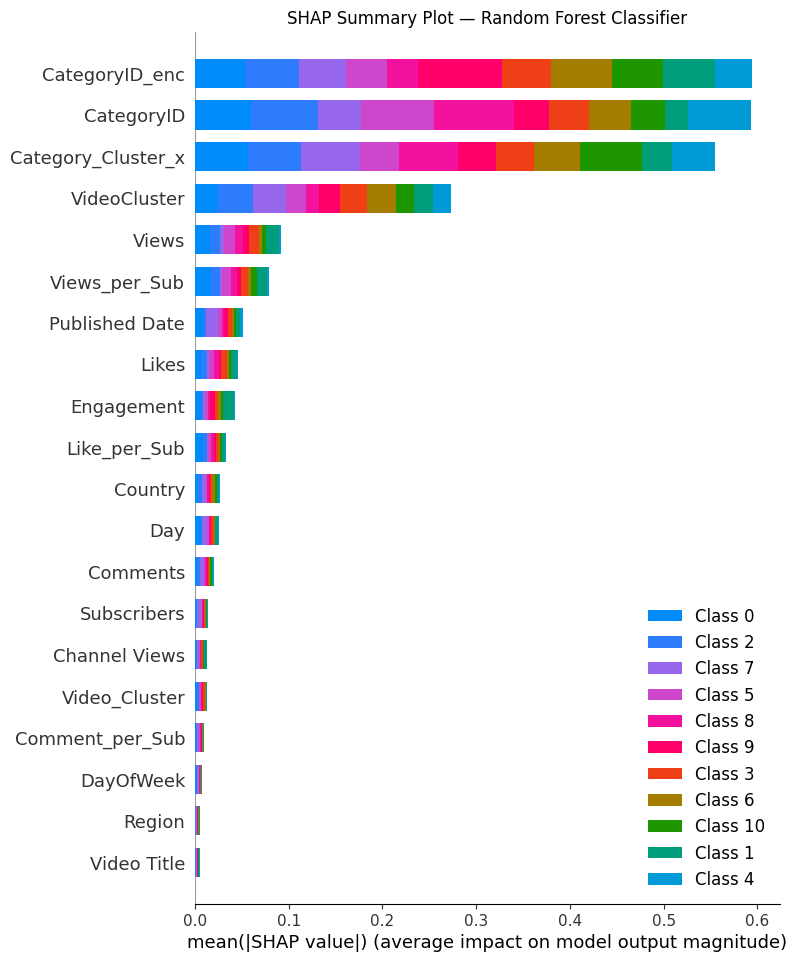

In [22]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 🎯 Modelni o‘qitamiz
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X, y)

# ⚡ SHAP Explainer (TreeExplainer)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X)  # yangi usul — explainer.shap_values emas

# 🎨 SHAP Summary Plot
shap.summary_plot(shap_values, X, show=False)
plt.title("SHAP Summary Plot — Random Forest Classifier")
plt.show()


### ✅ XULOSA  

🔍 Yuqoridagi **SHAP tahlili** natijasiga ko‘ra, modelimiz uchun **eng muhim xususiyatlar (features)** quyidagilar bo‘ldi:

📊 **Modelning prognoz aniqligiga eng katta ta’sir ko‘rsatgan ustunlar**:
- `CategoryID` 🎯  
- `Category_Cluster_x` 🔗  
- `VideoCluster` 🎬  

Bu ustunlar model qarorlarining asosiy omillari bo‘lib, **har bir sinf (class)** uchun sezilarli darajada farqlanadi.  

📈 **Shuningdek, muhimlik darajasi bo‘yicha o‘rta pog‘onadagi ustunlar**:
- `Views` 👁️  
- `Views_per_Sub` 📈  
- `Published Date` 📅  
- `Likes` ❤️  
- `Engagement` 🤝  

Ushbu belgilar **tomoshabinlar faolligini** va **kanal o‘sishini** ifodalaganligi sababli, ular model natijalarida muhim rol o‘ynaydi.

🔹 Nisbatan past ta’sir ko‘rsatgan ustunlar esa:
- `Comments`, `Subscribers`, `Country`, `Region`, `Video Title`  
  — bu xususiyatlar mavjud bo‘lsa ham, model uchun **kamroq informatsion qiymatga ega** bo‘lgan.

---

🎯 **Xulosa qilib aytganda**, modelning aniqligini oshirishda aynan **kategoriya va klasterlash bilan bog‘liq ustunlar** asosiy rol o‘ynamoqda.  
Bu esa shuni ko‘rsatadiki, **to‘g‘ri klasterlash va kategoriyalash** model natijasini sezilarli darajada yaxshilaydi.  

🚀 **Kelgusi bosqichlarda**, `VideoCluster` va `Category_Cluster_x` ustunlarini yanada optimallashtirish yoki **yangi kombinatsion xususiyatlar (feature interactions)** qo‘shish orqali model sifatini yanada oshirish mumkin.
